# Quiz 3 Practice

## Background

Congratulations! You've been hired by Professor Willow as a research fellow to study the wonderous world of Pokémon Go. Professor Willow is oddly curious about the Mouse Pokémon, Pikachu. Professor Willow has collected information about all different sorts of Pokémon around the world and it's up to you to figure out what about a  Pokémon makes it a Pikachu. Professor Willow also was kind enough to leave you a data dictionary of all the information he collected [here](./data-dic.txt). Good luck!

<img src="./images/Pikachu.png" alt="drawing" width="450"/>

### 1. Import your libraries

Professor Willow thinks that a K Nearest Neighbors Classifier and a Logistic Classifier will help you in figuring out the secrets behind Pikachu. Prtofessor Willow also thinks that PolynomialFeatures and GridSearchCV will be useful. A final note from Professor Willow says that he's a huge fan of confusion matrices. 

In [1]:
# import libraries here
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

### 2. Read in the data that Professor Willow left

In [2]:
pokemon_df = pd.read_csv('./data/pokemon.csv')
pokemon_df.head()

,id,pokestop_id,spawn_id,lat,lon,weight,size,expire_timestamp,updated,pokemon_id,...,sta_iv,level,weather,first_seen_timestamp,iv,expire_timestamp_verified,shiny,capture_1,capture_2,capture_3
0,10000000196405525479,732091131ec54ffc8d966b9ed1d9fc29.16,9.305992e+12,39.785747,-105.210933,0.496835,0.262335,1608111951,1608111039,546,...,6.0,21.0,0,1608110461,33.33,1,0.0,0.245035,0.344021,0.430028
1,10000000657919169026,e7d880c1f8d44f2dbdd8d88a12d81d72.16,NaN,39.613422,-105.007173,NaN,NaN,1607792005,1607791405,126,...,NaN,NaN,0,1607790453,NaN,0,NaN,NaN,NaN,NaN
2,10000000781073480313,dab0171d8be74d5193c05e3546a688ad.16,NaN,40.171312,-105.106310,NaN,NaN,1607841665,1607841065,111,...,NaN,NaN,0,1607839459,NaN,0,NaN,NaN,NaN,NaN
3,1000000280175979506,886c8cf8e49f44a7a0bcd9cfb2a4c740.16,9.305393e+12,40.564882,-105.110684,101.891304,1.094030,1607809821,1607808385,111,...,0.0,20.0,0,1607806247,17.78,1,0.0,0.418480,0.556548,0.661835
4,10000002838548687180,a2a8d331ed4645669a9ea408bad50b21.16,9.305990e+12,39.721999,-105.139555,9.822134,0.378020,1607644982,1607643467,387,...,7.0,30.0,0,1607643253,42.22,1,0.0,0.136668,0.197829,0.254658


In [3]:
pokemon_df.shape

(50000, 26)

In [4]:
pokemon_df.dtypes

id                            uint64
pokestop_id                   object
spawn_id                     float64
lat                          float64
lon                          float64
weight                       float64
size                         float64
expire_timestamp               int64
updated                        int64
pokemon_id                     int64
move_1                       float64
move_2                       float64
gender                         int64
cp                           float64
atk_iv                       float64
def_iv                       float64
sta_iv                       float64
level                        float64
weather                        int64
first_seen_timestamp           int64
iv                           float64
expire_timestamp_verified      int64
shiny                        float64
capture_1                    float64
capture_2                    float64
capture_3                    float64
dtype: object

### 3. The Professor says he only like Clean Data

Do any cleaning to the data you think is neccessary, the professor thinks it's likely you'll drop some columns.  

In [5]:
# your data cleaning here

# see how much we lose by dropping rows that have null values
pokemon_df.dropna(inplace = True)

In [6]:
# remove columns we don't think we'll be using
pokemon_df.drop(columns = ['id', 'pokestop_id', 'spawn_id', 'expire_timestamp', 'updated', 'weather', 
                          'first_seen_timestamp', 'expire_timestamp_verified'], axis = 1, inplace = True)
pokemon_df.head()

,lat,lon,weight,size,pokemon_id,move_1,move_2,gender,cp,atk_iv,def_iv,sta_iv,level,iv,shiny,capture_1,capture_2,capture_3
0,39.785747,-105.210933,0.496835,0.262335,546,320.0,273.0,2,342.0,5.0,4.0,6.0,21.0,33.33,0.0,0.245035,0.344021,0.430028
3,40.564882,-105.110684,101.891304,1.094030,111,241.0,126.0,2,815.0,6.0,2.0,0.0,20.0,17.78,0.0,0.418480,0.556548,0.661835
4,39.721999,-105.139555,9.822134,0.378020,387,215.0,273.0,1,881.0,3.0,9.0,7.0,30.0,42.22,0.0,0.136668,0.197829,0.254658
5,40.006848,-105.253354,0.507824,0.271311,546,320.0,272.0,2,279.0,4.0,7.0,8.0,17.0,42.22,0.0,0.272335,0.379278,0.470503
9,39.751932,-105.000270,52.345867,2.945922,336,266.0,13.0,2,90.0,10.0,14.0,15.0,2.0,86.67,0.0,0.901454,0.969064,0.990289


In [7]:
pokemon_df.reset_index(drop = True, inplace = True)

### 4. The Professor wants you to use the pokemon_id column as your target variable

**Note** : Pikachu has a national Pokédex number of 25. 

In [8]:
# set up your target variable
pokemon_df['pokemon_id'] = [1 if pokemon_df['pokemon_id'][i] == 25 else 0 for i in pokemon_df.index]
pokemon_df.head()

,lat,lon,weight,size,pokemon_id,move_1,move_2,gender,cp,atk_iv,def_iv,sta_iv,level,iv,shiny,capture_1,capture_2,capture_3
0,39.785747,-105.210933,0.496835,0.262335,0,320.0,273.0,2,342.0,5.0,4.0,6.0,21.0,33.33,0.0,0.245035,0.344021,0.430028
1,40.564882,-105.110684,101.891304,1.094030,0,241.0,126.0,2,815.0,6.0,2.0,0.0,20.0,17.78,0.0,0.418480,0.556548,0.661835
2,39.721999,-105.139555,9.822134,0.378020,0,215.0,273.0,1,881.0,3.0,9.0,7.0,30.0,42.22,0.0,0.136668,0.197829,0.254658
3,40.006848,-105.253354,0.507824,0.271311,0,320.0,272.0,2,279.0,4.0,7.0,8.0,17.0,42.22,0.0,0.272335,0.379278,0.470503
4,39.751932,-105.000270,52.345867,2.945922,0,266.0,13.0,2,90.0,10.0,14.0,15.0,2.0,86.67,0.0,0.901454,0.969064,0.990289


In [9]:
pokemon_df.shape

(10678, 18)

### 5. The Professor has given you the freedom to choose whatever predictor variables you want, however he requires that you to use PolynomialFeatures with at least two variables, as well as use at least one categorical variable.

Create your predictor variables below and make sure to dummify your categorical variable. You may also want to scale your data here too. 

In [10]:
# create Poly variables
poly = PolynomialFeatures(include_bias = False)
features = ['weight', 'size']
X = pokemon_df[features]
X_poly = poly.fit_transform(X)
poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names(input_features=features))
# scale data
sc = StandardScaler()
scaled_df = sc.fit_transform(poly_df)
#scaled_df.shape
scaled_df = pd.DataFrame(scaled_df, columns=poly_df.columns)
scaled_df.head()

,weight,size,weight^2,weight size,size^2
0,-0.622943,-0.918572,-0.169052,-0.399996,-0.585803
1,3.073511,1.429762,1.484488,2.422870,1.058241
2,-0.282978,-0.591929,-0.153725,-0.309165,-0.477841
3,-0.622542,-0.893228,-0.169050,-0.399807,-0.578822
4,1.267274,6.658679,0.267340,3.506329,11.961712


In [11]:
# create dummies
X_dummy = pokemon_df[['move_1', 'move_2']]

X_dummy = X_dummy.astype(int)
X_dummy['move_1'] = [0 if pokemon_df['move_1'][i] == 219 else 1 if pokemon_df['move_1'][i] == 205 else 2 
                        for i in pokemon_df.index]
X_dummy['move_2'] = [0 if pokemon_df['move_2'][i] == 35 else 1 if pokemon_df['move_1'][i] == 251 else
                        2 if pokemon_df['move_2'][i] == 79 else 3 for i in pokemon_df.index]
X_dummy = X_dummy.astype(str)
X_dummy = pd.get_dummies(X_dummy, drop_first = True)

In [12]:
X_dummy.head()

,move_1_1,move_1_2,move_2_2,move_2_3
0,0,1,0,1
1,0,1,0,1
2,0,1,0,1
3,0,1,0,1
4,0,1,0,1


In [13]:
X = pd.concat([X_dummy, scaled_df], axis = 1)
X.head()

,move_1_1,move_1_2,move_2_2,move_2_3,weight,size,weight^2,weight size,size^2
0,0,1,0,1,-0.622943,-0.918572,-0.169052,-0.399996,-0.585803
1,0,1,0,1,3.073511,1.429762,1.484488,2.422870,1.058241
2,0,1,0,1,-0.282978,-0.591929,-0.153725,-0.309165,-0.477841
3,0,1,0,1,-0.622542,-0.893228,-0.169050,-0.399807,-0.578822
4,0,1,0,1,1.267274,6.658679,0.267340,3.506329,11.961712


### 6. Verify how many Pikachu and not Pikachu are in the data and create a train/test split appropriately. 

In [14]:
# train/test split here
y = pokemon_df['pokemon_id']
y.value_counts()

0    10360
1      318
Name: pokemon_id, dtype: int64

In [15]:
# unbalanced classes we will use stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

## OH NO!!!! Team Rocket disrupts your work!

<img src="./images/team_rocket.png" alt="drawing" width="450"/>

## Luckily,  Professor Willow left you with a strong Pikachu to send them blasting off again :)

### 7. With Team Rocket taken care of, you are now tasked with using GridSearch to fit a K Nearest Neighbors model using odd numbers of nearest neighbors up to 25. 

In [16]:
# grid search code here
knn_params = {
    'n_neighbors': [i for i in range(1, 26) if i % 2 == 1]
}

knn_gridsearch = GridSearchCV(estimator = KNeighborsClassifier(),
                             param_grid = knn_params, 
                             cv = 5, 
                             verbose = 1,
                             n_jobs = -1)
knn_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    6.9s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25]},
             verbose=1)

### 8. Determine the best number of neighbors to use. Also comment on how this affects the bias/varience of your model, Dr. Willow expects a good explanation!

In [17]:
# best neighbors here 
knn_gridsearch.best_params_

{'n_neighbors': 3}

Here we see our best result is using 5 nearest neighbors. As we have a low number of neighbors we can assume that this model is likely high varience, low bias. 

### 9. Score your model, decide whether your model is overfit or underfit. 

In [18]:
# score model here
knn_gridsearch.best_score_

0.9952545264702695

In [19]:
knn_gridsearch.fit(X_test, y_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    0.7s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25]},
             verbose=1)

In [20]:
knn_gridsearch.best_score_

0.9940074906367041

Here we see that our model is neither overfit or underfit as there is not much differnce between our scores. 

In [21]:
y_preds = knn_gridsearch.predict(X_test)

### 10. Create and plot a confusion matrix to see how well your model identified Pikachu. Comment on the specificity and sensitivity of your model. 

In [22]:
# confusion matrix here

confusion_matrix(y_test, y_preds)

array([[2586,    4],
       [  12,   68]])

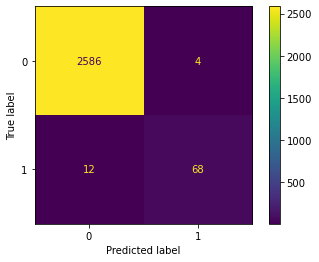

In [23]:
plot_confusion_matrix(knn_gridsearch, X_test, y_test)

In [24]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()

In [25]:
# specificity
(tn) / (tn + fp)

0.9984555984555985

In [26]:
# sensitivity
(tp) / (tp + fn)

0.85

Here we see that our specificity and sensitivity are both high so we can conclude that our model is amazing at determining if a Pokémon is a Pikachu. Any false negatives and positives we had we can blame on the Transform Pokémon, Ditto as it is known to like to pose as Pikachu and other Pokémon from time to time.  

### 11. Professor Willow doesn't think K Nearest Neighbors will be good at identifying Pikachu so he asks you to create a Logistic Regression model that he thinks will do better. 

Do this with LASSO and Ridge regularization with $\alpha $ values between 1 and 100. As the professor loves grid search you are expected to do it here as well. 

In [27]:
# create logistic regression model
# grid search code here
logr_params = {
    'penalty': ['l1', 'l2'],
    'C': np.linspace(0.01, 1, 10)
}

logr_gridsearch = GridSearchCV(estimator = LogisticRegression(solver = 'liblinear'),
                             param_grid = logr_params, 
                             cv = 5, 
                             verbose = 1,
                             n_jobs = -1)
logr_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [28]:
log_preds = logr_gridsearch.predict(X_test)

### 12. Find the best model as well as score your model in order to compare it to your KNN model. Is Professor Willow right or should we just have gone with KNN?

In [29]:
logr_gridsearch.best_params_

{'C': 0.45, 'penalty': 'l1'}

In [30]:
# find and score your best model here
logr_gridsearch.best_score_

0.9925073358489271

In [31]:
logr_gridsearch.fit(X_test, y_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [32]:
logr_gridsearch.best_score_

0.9940074906367041

Here we see that our logistic regression model is slightly overfit and doesn't perform as well as knn, we will tell Proffessor Willow he was wrong when he comes back. 

### 13. Create and plot a confusion matrix for your Logistic Regression model. Comment on the specificity and sensitivity of your model. 

In [33]:
# confusion matrix here
confusion_matrix(y_test, log_preds)

array([[2587,    3],
       [  15,   65]])

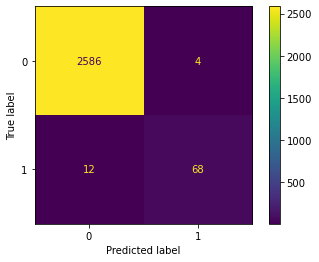

In [34]:
plot_confusion_matrix(logr_gridsearch, X_test, y_test)

In [35]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()

In [36]:
# specificity
(tn) / (tn + fp)

0.9984555984555985

In [37]:
# sensitivity
(tp) / (tp + fn)

0.85

Here again we see that our specificity and sensitivity are both high so we can conclude that our model is amazing at determining if a Pokémon is a Pikachu. Any false negatives and positives we had we can blame on the Transform Pokémon, Ditto as it is known to like to pose as Pikachu and other Pokémon from time to time. 

### 14. Finally use your best logistic regression model and evaluate the coefficients of all the predictor variables you decided to use. 

In [38]:
# evaluate coefficients here
lr = LogisticRegression(penalty = 'l1', C = 0.34, solver = 'liblinear')
lr.fit(X_test, y_test)
lr.coef_

array([[ 2.22714601, -4.19599452, -0.11877911, -2.96513162,  0.        ,
        -1.27168355,  0.        ,  0.        , -1.28444043]])

In [39]:
np.exp(lr.coef_)

array([[9.2733622 , 0.01505576, 0.88800393, 0.05155368, 1.        ,
        0.28035923, 1.        , 1.        , 0.27680543]])

Here we see that a Pokémon with the move Thunder Shock was 3.3 times more likely to be Pikachu, a Pokémon without Quick Attack or Thunder Shock was 0.012 times as likely to be a Pikachu, the move Thunderbolt was unable to determine if a Pokémon was likely to be Pikachu . A Pokémon that did not have Thunderbolt, Wild Charge, or Discharge was 0.09 times as likely to be Pikachu. We see that weight, size, weight^2, weight size were not able to determine if a Pokémon was likely to be a Pikachu or not. Finally for each increase in size^2, we see that a Pokémon was 0.08 times as likely to be a Pikachu. Everything here of course assumes all else is constant. 